**Cálculadora de diagrama de cortantes y flectores (P9)**
------------------------------------------------------------------------------
***

> El siguiente código calcula el diagrama de cortante y flector para una barra como la de la figura con cuatro nodos
> $j=1,...,4$ en los que puede haber esfuerzos $P_{j}$, momentos $T_{j}$ y reacciones $R_{jy}$, $M_{jz}$.
>Permite resolver los problemas de la asignatura que no tienen más de 4 puntos con cargas/momentos/reacciones puntuales. Permite añadir cargas distribuidas también.

<img src="disp.png" width="800">



> ¿Cómo se usa? 
- Añadir las solicitaciones (cargas Pj, momentos Tj y cargas distribuidas q_{j,j+1}).
- Añadir las ecuaciones ΣFy=0 y ΣMz=0 en la primera y segunda linea del comando linsolve. Las reacciones que no participen en las ecuaciones (R0y, R1y, R2, R3 y,M0z, M1z, M2z y M3z) hay que añadirlas en las lineas de abajo
>Nota: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.

(7733.33333333333, 9666.66666666667, 0, 0, 0, 0, 0, 0)
La expresión del cortante en el tramo 1 es:  -362.5*x**2 - 2900.0*x + 7733.33333333333
La expresión del flector en el tramo 1 es:  -120.833333333333*x**3 - 1450.0*x**2 + 7733.33333333333*x
La expresión del giro en el tramo 1 es:  A1 - 0.000151041666666667*x**4 - 0.00241666666666667*x**3 + 0.0193333333333333*x**2
La expresión de la deflexion en el tramo 1 es:  1.0*A1*x + B1 - 3.02083333333333e-5*x**5 - 0.000604166666666667*x**4 + 0.00644444444444445*x**3

Aplicadas las condiciones de contorno...
La expresión del giro en el tramo 1 es:  -0.000151041666666667*x**4 - 0.00241666666666667*x**3 + 0.0193333333333333*x**2 - 0.0567111111111111
La expresión de la deflexion en el tramo 1 es:  -3.02083333333333e-5*x**5 - 0.000604166666666667*x**4 + 0.00644444444444445*x**3 - 0.0567111111111111*x

 
El maximo cortante es:  [9666.66666667] N
El maximo flector  es:  [8726.68049502] Nm


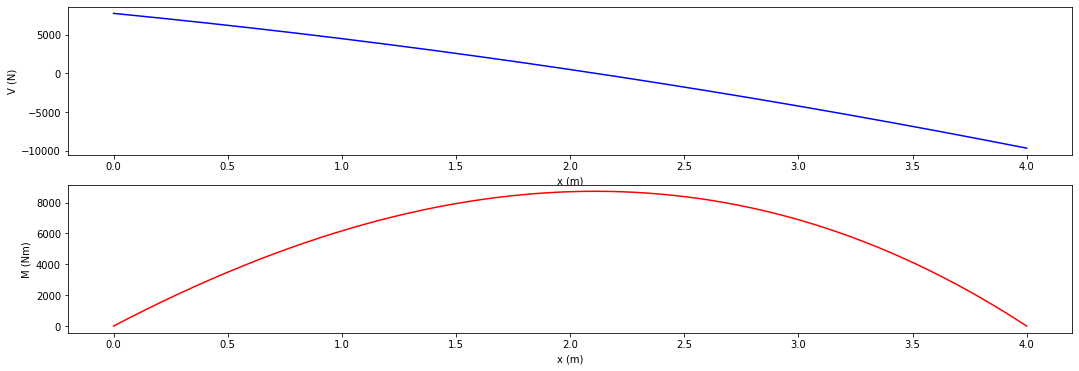

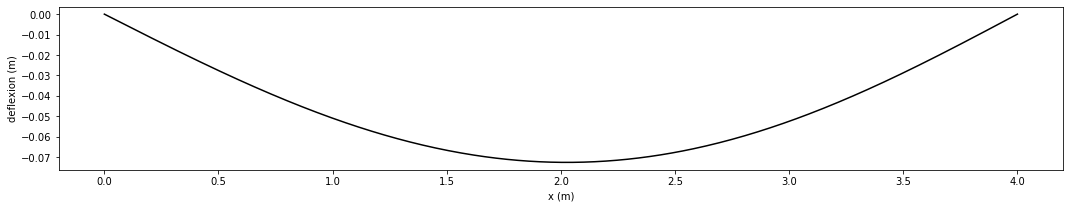

In [3]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

x=symbols('x') #variable simbólica coordenada x
R0y,R1y,R2y,R3y=symbols('R0y R1y R2y R3y')
M0z,M1z,M2z,M3z=symbols('M0z M1z M2z M3z')

A1,B1,A2,B2,A3,B3=symbols('A1 B1 A2 B2 A3 B3')

#solicitaciones
P0=0.0 #N  la carga en x=0
P1=0.0 #N  la carga en x=L1
P2=0.0 #N  la carga en x=L1+L2
P3=0.0 #N  la carga en x=L1+L2+L3

T0=0.0 #Nm  el par en x=0
T1=0.0 #Nm  la par en x=L1
T2=0.0 #Nm  la par en x=L1+L2+L3
T3=0.0 #Nm  la par en x=L1+L2+L3

#cargas distribuidas (positivas en sentido +y)
qq01=-(5800/2+5800/2*x/4.0)  #N/m la carga distribuida entre los puntos 0 y 1 (entre x=0 y x=L1)
qq12=0.0 #N/m
qq23=0.0 #N/m

#geometría
L1=4.0 #longitud tramo 01
L2=0.0 #longitud tramo 12
L3=0.0 #longitud tramo 23
#... añadir más si hay más tramos

L=L1+L2+L3 #longitud total

#material

E=1.0e4
I=2.0e1

#Cálculo estático. Añadir las ecuaciones ΣFy=0 y ΣMz=0 en la primera y segunda linea. Las reacciones que no participen
#en las ecuaciones (R0y,R1y,R2y,M0z,M1z,M2z) hay que añadirlas en las lineas de abajo
#Nota: Todas las reacciones y solicitaciones se consideran positivos en dirección positiva de los ejes cartesianos.
sol,=linsolve([  R0y+R1y+integrate(qq01,(x, 0, L)),   #se pone todo positivo siempre
               R1y*L+integrate(x*qq01,(x, 0, L)),
              R2y,
              R3y,
              M0z,
              M1z,
              M2z,
              M3z,
             ], (R0y,R1y,R2y,R3y,M0z,M1z,M2z,M3z))
print (sol)


#reacciones
R0y=sol[0] #N reacción en y en x=0 
R1y=sol[1] #N reacción en y en x=L1 
R2y=sol[2] #N reacción en y en x=L1+L2 
R3y=sol[3] #N reacción en y en x=L1+L2+L3
M0z=sol[4] #Nm reacción momento en x=0 
M1z=sol[5] #Nm reacción momento en x=L1 
M2z=sol[6] #Nm reacción momento en x=L1+L2 
M3z=sol[7] #Nm reacción momento en x=L1+L2+L3 


#-------------------------------------------------------------------------------------#
#---------------------------------- CÁLCULO TRAMOS -----------------------------------#
#-------------------------------------------------------------------------------------#

#--------------------------------------TRAMO 1----------------------------------------#
#Definimos la carga distribuida
def q1(x):        
    return  qq01

#Definimos el cortante
VL=R0y+P0 #Este es el valor del cortante a la izquierda del tramo 1, lo que llamamos V+(x=0)
def cortante1(x):        
    return  integrate(q1(x), (x, 0, x)) + VL #esto quiere decir que integramos q(x) dandole a x limites entre 0 y x. 

#Definimos el flector
ML=-M0z-T0 #Este es el valor del flector a la izquierda del tramo 1, lo que llamamos M+(x=0)
def flector1(x):        
    return  integrate(cortante1(x), (x, 0, x)) + ML #en MPa 

V1=cortante1(x) 
M1=flector1(x)
print("La expresión del cortante en el tramo 1 es: ", V1)
print("La expresión del flector en el tramo 1 es: ", M1)


#Elástica
def giro1(x,A1):        
    return  integrate(flector1(x)/(E*I),x) + A1 #en MPa

def deflexion1(x,A1,B1):        
    return  integrate(giro1(x,A1),x) + B1 #en MPa

G1=giro1(x,A1) 
U1=deflexion1(x,A1,B1)
print("La expresión del giro en el tramo 1 es: ", G1)
print("La expresión de la deflexion en el tramo 1 es: ", U1)
print("")


#--------------------------------------TRAMO 2----------------------------------------#
#Definimos la carga distribuida
def q2(x):        
    return  qq12

#Definimos el cortante
VL=V1.subs([(x,L1)]) + R1y + P1 #Este es el valor del cortante a la izquierda del tramo 2, lo que llamamos V+(x=L1) que se 
                          #calcula mediante el equilibrio de la rebanada como el cortante a la izquierda V-(x=L1) más
                          #la carga puntual en x=L1
def cortante2(x):        
    return  integrate(q2(x), (x, L1, x)) + VL #esto quiere decir que integramos q(x) dandole a x limites entre 0 y x. 

#Definimos el flector
ML=M1.subs([(x,L1)]) - M1z - T1 #Este es el valor del flector a la izquierda, lo que llamamos M+(x=L1)
def flector2(x):        
    return  integrate(cortante2(x), (x, L1, x)) + ML #en MPa 

V2=cortante2(x) 
M2=flector2(x)
if L2 !=0:
    print("La expresión del cortante en el tramo 2 es: ", V2)
    print("La expresión del flector en el tramo 2 es: ", M2)

#elástica
def giro2(x):        
    return  integrate(flector2(x)/(E*I),x) + A2 #en MPa

def deflexion2(x):        
    return  integrate(giro2(x),x) + B2 #en MPa

G2=giro2(x) 
U2=deflexion2(x)
if L2 !=0:
    print("La expresión del giro en el tramo 2 es: ", G2)
    print("La expresión de la deflexion en el tramo 2 es: ", U2)
    print("")



#--------------------------------------TRAMO 3----------------------------------------#
#Definimos la carga distribuida
def q3(x):        
    return  qq23

#Definimos el cortante
VL=V2.subs([(x,L1+L2)]) + R2y + P2 #Este es el valor del cortante a la izquierda del tramo 2, lo que llamamos V+(x=L1) que se 
                          #calcula mediante el equilibrio de la rebanada como el cortante a la izquierda V-(x=L1) más
                          #la carga puntual en x=L1
def cortante3(x):        
    return  integrate(q3(x), (x, L1+L2, x)) + VL #esto quiere decir que integramos q(x) dandole a x limites entre 0 y x. 

#Definimos el flector
ML=M2.subs([(x,L1+L2)]) - M2z - T2 #Este es el valor del flector a la izquierda, lo que llamamos M+(x=L1)
def flector3(x):        
    return  integrate(cortante3(x), (x, L1+L2, x)) + ML #en MPa 

V3=cortante3(x) 
M3=flector3(x)
if L3 !=0:
    print("La expresión del cortante en el tramo 3 es: ", V3)
    print("La expresión del flector en el tramo 3 es: ", M3)

#Elástica
def giro3(x):        
    return  integrate(flector3(x)/(E*I),x) + A3 #en MPa

def deflexion3(x):        
    return  integrate(giro3(x),x) + B3 #en MPa

G3=giro3(x) 
U3=deflexion3(x)
if L3 !=0:
    print("La expresión del giro en el tramo 3 es: ", G3)
    print("La expresión de la deflexion en el tramo 3 es: ", U3)
    print("")

    
#-------------------------------------------------------------------------------------#
#----------------------------------- C.C. ELÁSTICA -----------------------------------#
#-------------------------------------------------------------------------------------#    
  
G1_0=G1.subs([(x,0)])    #giro en tramo 1, punto 0
G1_1=G1.subs([(x,L1)])   #giro en tramo 1, punto 1
G2_1=G2.subs([(x,L1)])   #giro en tramo 2, punto 1
G2_2=G2.subs([(x,L1+L2)]) 
G3_2=G3.subs([(x,L1+L2)])    
G3_3=G3.subs([(x,L1+L2+L3)]) 

U1_0=U1.subs([(x,0)])    #deflexion en tramo 1, punto 0
U1_1=U1.subs([(x,L1)])   #deflexion en tramo 1, punto 1
U2_1=U2.subs([(x,L1)])   #deflexion en tramo 2, punto 1
U2_2=U2.subs([(x,L1+L2)]) 
U3_2=U3.subs([(x,L1+L2)])    
U3_3=U3.subs([(x,L1+L2+L3)]) 
    
#ejemplo CC en linsolve para una barra con dos tramos, a la izquierda apoyada y a la derecha empotrada:
# sole,=linsolve([    U1_0,      #deflexion en tramo1, punto 0 es nula (apoyo)
#                     U1_1-U2_1, #deflexion en tramo1, punto 1 es igual a deflexion en tramo2, punto 1 (continuidad)
#                     G1_1-G2_1, #giro en tramo1, punto 1 es igual a giro en tramo2, punto 1 (continuidad deriv.)
#                     G2_2       #giro en tramo2, punto 2 es nula (apoyo)
#              ], (A1,B1,A2,B2)) #incognitas
    
sole,=linsolve([  U1_0,      #deflexion en tramo1, punto 0 es nula (apoyo)
                  U1_1       #deflexion en tramo1, punto 1 es nula (apoyo)
             ], (A1,B1))



G1_exp=G1.subs([(A1,sole[0])])
U1_exp=U1.subs([(A1,sole[0]),(B1,sole[1])])
print("Aplicadas las condiciones de contorno...")
print("La expresión del giro en el tramo 1 es: ", G1_exp)
print("La expresión de la deflexion en el tramo 1 es: ", U1_exp)
print("")

if L2 !=0:
    G2_exp=G2.subs([(A2,sole[2])])
    U2_exp=U2.subs([(A2,sole[2]),(B2,sole[3])])
    print("La expresión del giro en el tramo 2 es: ", G2_exp)
    print("La expresión de la deflexion en el tramo 2 es: ", U2_exp)
    print("")

    
if L2 !=0:
    G3_exp=G3.subs([(A3,sole[4])])
    U3_exp=U3.subs([(A3,sole[4]),(B3,sole[5])])
    print("La expresión del giro en el tramo 3 es: ", G3_exp)
    print("La expresión de la deflexion en el tramo 3 es: ", U3_exp)
    print("")

    

#-------------------------------------------------------------------------------------#
#----------------------------- REPRESENTACIÓN GRÁFICA --------------------------------#
#-------------------------------------------------------------------------------------#

Xmin= 0 ; Xmax=L; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
xx=np.zeros((nopto,1))
vv=np.zeros((nopto,1))
mm=np.zeros((nopto,1))
uu=np.zeros((nopto,1))


for i in range(0,nopto): 
    xx[i] = Xmin+i*(Xmax-Xmin)/(nopto-1) 
    if xx[i]<=L1:
        vv[i]=V1.subs([(x,xx[i])])
        mm[i]=M1.subs([(x,xx[i])])
        uu[i]=U1_exp.subs([(x,xx[i])])
    elif xx[i]<=L1+L2 and xx[i]>L1:
        vv[i]=V2.subs([(x,xx[i])])
        mm[i]=M2.subs([(x,xx[i])]) 
        uu[i]=U2_exp.subs([(x,xx[i])])
    else:
        vv[i]=V3.subs([(x,xx[i])])
        mm[i]=M3.subs([(x,xx[i])]) 
        uu[i]=U3_exp.subs([(x,xx[i])])
        
filename="Nombre de la función"
fig, (ax,ax2) = plt.subplots(2,1,figsize=(18, 6))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax.plot(xx,vv, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.set_xlabel("x (m)") # Nombre y unidades del eje x
ax.set_ylabel("V (N)") # Nombre y unidades del eje y

ax2.plot(xx,mm, color="red") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.set_xlabel("x (m)") # Nombre y unidades del eje x
ax2.set_ylabel("M (Nm)") # Nombre y unidades del eje y

fig2, (ax3) = plt.subplots(1,1,figsize=(18, 3))  # Esto es como decir "Abracadabra! Hágase la figura!". 
                          # Se genera un objeto figura que definimos a continuación

ax3.plot(xx,uu, color="black") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax3.set_xlabel("x (m)") # Nombre y unidades del eje x
ax3.set_ylabel("deflexion (m)") # Nombre y unidades del eje y

print(" ")
print("El maximo cortante es: ", max(abs(vv)),"N")
print("El maximo flector  es: ", max(abs(mm)),"Nm")


**Cálculo de tensiones máximas en la sección**

> Se considera una sección en forma de doble-T* como la de la figura:

<img src="perfilI.png" width="300" height="310">

> Para calcular $\sigma_n$ y $\tau$ en la sección, será necesario especificar el momento flector y cortante máximo (obtenidos arriba), así como la geometría del perfil: parámetros $h$, $b$, $bb$, $e$ y $e1$, en mm.

>*Nota: Para conseguir una sección rectangular basta con hacer $B=bb=e$ y $e1=0$.

El centro de gravedad del perfil está en (xc,yc)= 0.0 0.0
El momento de inercia de la sección respecto del eje z es= 16128.0 cm^4
La máxima tension normal es:  [6.49306548] MPa
La máxima tension cortante es:  [431.54558831] KPa


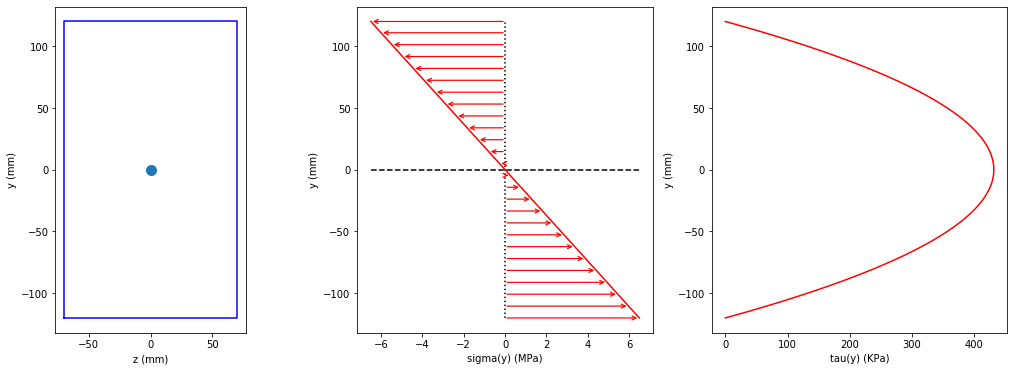

In [4]:
from sympy import *             # Librería para trabajo simbólico
import math                     # Librería para utilizar símbolos matemáticos como el número pi, que se escribe como math.pi
import numpy as np              # Librería para poder trabajar con matrices y vectores
import matplotlib.pyplot as plt # Librería para poder dibujar gráficas

#-------------------------------------------------------------------------------------#
#-----------------------------------Datos de entrada----------------------------------#
#-------------------------------------------------------------------------------------#

# momento flector
mf= 8726.68; #N*m   
# cortante
vy= 9666.66; #N   
    
    
h=240 #altura total en mm
b=140 #anchura en mm
e=140 #espesor del alma en mm
e1=0 #espesor del ala en mm

# en el caso de querer definir una anchura b distinta en la base
bb = 140;
    


#-------------------------------------------------------------------------------------#
#------------------------------Definición de funciones--------------------------------#
#-------------------------------------------------------------------------------------#
    
#--------------------------------------Ley de Navier----------------------------------#
def tensionNa(y,M,I,Yc):        
    return  -(y-Yc)*M/I*1000 #en MPa 
#-------------------------------------------------------------------------------------#


#------------------------------------Ley de Colignon----------------------------------#
def tensionCol(y,V,I,Yc):        
    ymax=h/2
    ymin=-h/2
    y1=ymax-e1
    y2=ymin+e1
    if y>y1:
        return V*Qest(y,Yc)/(I*b)*1000 #en MPa 
    elif y<y1 and y>y2:
        return V*Qest(y,Yc)/(I*e)*1000 #en MPa 
    else: #y<y2
        return V*Qest(y,Yc)/(I*bb)*1000 #en MPa 
#-------------------------------------------------------------------------------------#

#------------------------------------Momento estático---------------------------------#
def Qest(y,Yc):
    ymax=h/2-Yc
    ymin=-h/2-Yc
    y1=ymax-e1
    y2=ymin+e1
    ya=y-Yc
    if ya>y1:
        return b*(ymax**2.0-ya**2.0)/2
    elif ya<y1 and ya>y2:
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-ya**2.0)/2
    else: #y<y2
        return b*(ymax**2.0-y1**2.0)/2 + e*(y1**2.0-y2**2.0)/2 + bb*(y2**2.0-ya**2.0)/2
#-------------------------------------------------------------------------------------#

#-------------------------------------------------------------------------------------#
#----------------------------------------Cálculo--------------------------------------#
#-------------------------------------------------------------------------------------#

# Se genera la geometría del perfil para dibujarla
nopto=13 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)
xx=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar
ff=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar

xx[0]=-bb/2
ff[0]=-h/2
xx[1]=-bb/2
ff[1]=-h/2+e1
xx[2]=-e/2
ff[2]=-h/2+e1
xx[3]=-e/2
ff[3]=h/2-e1
xx[4]=-b/2
ff[4]=h/2-e1
xx[5]=-b/2
ff[5]=h/2

for i in range(6,nopto-1):                 # Loop!! La i toma valores en el intervalo [6,nopto-1) (El último valor no se toma)     
    j=i-6
    xx[i] = - xx[5-j]
    ff[i] =   ff[5-j]

xx[12]=xx[0]
ff[12]=ff[0]

# primero se calculan las areas de las 3 partes: ala inferior (1), alma (2) y ala superior (3)
A1=bb*e1
A2=e*(h-2*e1)
A3=b*e1

# y las posiciones de sus c.d.g. 
d1=-h/2+e1/2
d2= 0.0
d3=h/2-e1/2

# se calcula el c.d.g. del perfil
xc=0.0
yc=(A1*d1+ A2*d2 + A3*d3)/(A1+A2+A3) 

print("El centro de gravedad del perfil está en (xc,yc)=",xc,yc)

# se calcula el momento de inercia
# primero, se calculan I de las 3 partes
I1=bb*e1**3/12
I2=e*(h-2*e1)**3/12
I3=b*e1**3/12

# luego se trasladan al c.d.g del perfil utilizando Tª de Steiner
I1=I1+A1*(yc-d1)**2
I2=I2+A2*(yc-d2)**2
I3=I3+A3*(yc-d3)**2

# y se calcula el momento de inercia total
It=I1+I2+I3

print("El momento de inercia de la sección respecto del eje z es=",It/10000,"cm^4")



# se calcula la tensión

Ymin= -h/2 ; Ymax=h/2; nopto=500 # (Xmin,Xmax,nopto) = (extremo inferior, extremo superior, número de puntos que se pintan)\n",
yy=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores x que se van a utilizar\n",
ss=np.zeros((nopto,1)) # Una lista (vector) de nopto zeros. Contendrá todos los valores de f(x) que se van a pintar\n",
tt=np.zeros((nopto,1))

for i in range(0,nopto):                 # Loop!! La i toma valores en el intervalo [0,nopto) (El último valor no se toma)     \n",
    yy[i] = Ymin+i*(Ymax-Ymin)/(nopto-1) 
    ss[i]=tensionNa(yy[i],mf,It,yc)
    tt[i]=tensionCol(yy[i],vy,It,yc)

# Se pinta f(x) en función de x
filename="Nombre de la función"
fig, (ax,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6))   
                          
ax.set_aspect('equal', adjustable='box')

ax.plot(xx,ff, color="blue") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax.plot(xc,yc, 'o', markersize=10)
ax.set_xlabel("z (mm)") # Nombre y unidades del eje x
ax.set_ylabel("y (mm)") # Nombre y unidades del eje y
#ax.legend() # Hace que se pinte la leyenda

ax2.set_xlabel("sigma(y) (MPa)") # Nombre y unidades del eje  x
ax2.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax2.plot((ss[0],ss[nopto-1]),(yc,yc), color="black", linestyle="--") 
ax2.plot((0,0),(-h/2,h/2), color="black", linestyle=":") 
ax2.plot(ss,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!
ax2.annotate("", xy=(ss[nopto-1], h/2), xytext=(0.0, h/2),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})
for i in range(0,nopto,20):   
    ax2.annotate("", xy=(ss[i], yy[i]), xytext=(0.0, yy[i]),arrowprops={'arrowstyle':'->','lw': 1.2, 'color': 'r'})

    
ax3.set_xlabel("tau(y) (KPa)") # Nombre y unidades del eje  x
ax3.set_ylabel("y (mm)") # Nombre y unidades del eje y
ax3.plot(tt,yy, color="red",linestyle="-") # Se le dice a Python, ¡¡¡pinta f(x)!!!

print("La máxima tension normal es: ", max(abs(ss)),"MPa")
print("La máxima tension cortante es: ", max(abs(tt)),"KPa")
